In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import Quadratics
import math

Create our data set to interpolate. 

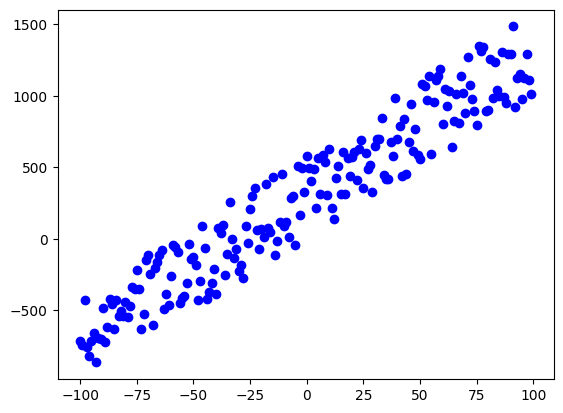

In [3]:
n = 100

inputs = np.arange(-n, n)
np.random.shuffle(inputs)
outputs = (10 * inputs) + (6 * n * np.random.rand(2*n)) #+ (2 * np.pow(inputs, 2) / -n) 
plt.plot(inputs, outputs, 'bo')


Apply linear regression through standard algorithms. 

Defines a weight parameter and a bias parameter. 



In [4]:
train_inputs = inputs[0:190]
train_outputs = outputs[0:190]

weight = 0
bias = 0
alpha = 0.00005

biases = []
weights = []

numEpochs = 200
for i in range(numEpochs):
    biases.append(bias)
    weights.append(weight)

    prediction = weight * train_inputs + bias

    loss = np.sum(np.pow(train_outputs - prediction, 2)) / len(prediction)

    dw = -2 * np.dot(train_outputs - prediction, train_inputs) / len(prediction)
    db = -2 * np.sum(train_outputs - prediction) / len(prediction)

    weight = weight - alpha * dw
    bias = bias - 1000 * alpha * db



33235.079097044916
slope: 9.782205254449618
b: 301.83318516998713


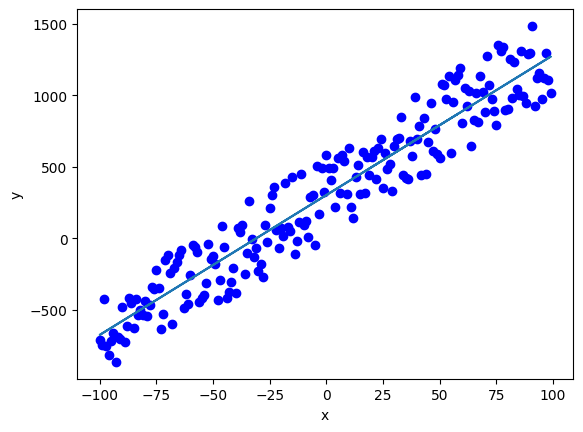

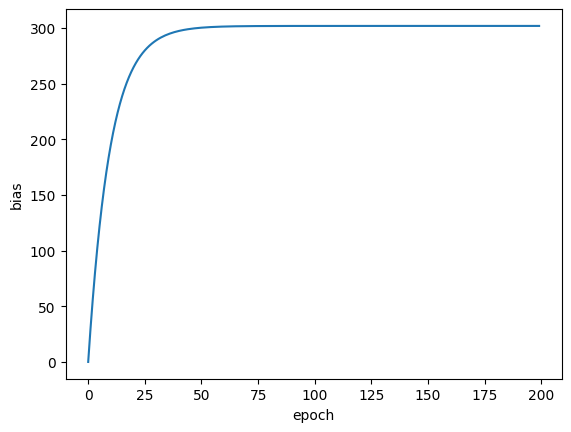

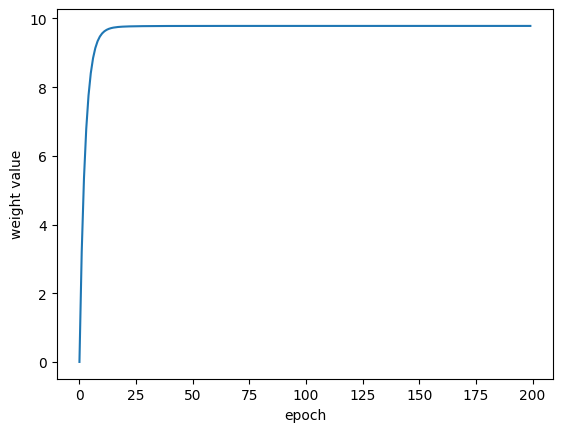

In [5]:
test_inputs = inputs[190:201]
test_outputs = outputs[190:201]

prediction = weight * test_inputs + bias

loss = np.sum(np.pow(test_outputs - prediction, 2)) / len(prediction)
print(loss)

plt.figure(0)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(inputs, outputs, 'bo', inputs, weight * inputs + bias, '-')

plt.figure(1)
plt.xlabel('epoch')
plt.ylabel('bias')
plt.plot(range(numEpochs), biases)

plt.figure(2)
plt.xlabel('epoch')
plt.ylabel('weight value')
plt.plot(range(numEpochs), weights)

print('slope: ' + str(weight))
print('b: ' + str(bias))

In [6]:
train_inputs = inputs[0:190]
train_outputs = outputs[0:190]

numEpochs = 9 
matrix = np.zeros((numEpochs, 3))


for i in range(numEpochs):
    weight = (random.random() - 0.5) * 200
    bias = (random.random() - 0.5) * 200

    prediction = weight * train_inputs + bias

    loss = np.sum(np.pow(train_outputs - prediction, 2)) / len(prediction)

    matrix[i][0] = bias
    matrix[i][1] = weight
    matrix[i][2] = loss

coeffs = Quadratics.FindPolynomial.find_equation(matrix[:, :2], matrix[:, 2])
 #take dot product with x^2 y^2, x^2 y, etc to evaluate at a point


numVars = matrix.shape[1] - 1
degree = int(math.pow(matrix.shape[0],1/(numVars))) - 1
general = (degree + 1)**(numVars)

#coeffs gives eq of 
partials = np.round(Quadratics.FindPolynomial.diffrentiate(coeffs, degree, numVars))
#print(np.round(partials)) #gradient vector; multiply col one with point raised to power

currentPoint = np.zeros((general))
b_w = np.array([0, 0])
for i in range(100):
    for j in range(general):
        currentPoint[j] = np.prod(b_w**(np.array(Quadratics.FindPolynomial.numberToBase(general-j-1, degree + 1, numVars))))
    # print(partials.T)
    # print(currentPoint)
    b_w = b_w - 0.001 * (partials.T @ currentPoint)
    print(b_w )
# for i in range(100):
#     #take partials wrt b, then w, then evaluate using cyclic dot product with component, then move in that direction




[ 0.    63.984]
[  45.68252851 -294.198432  ]
[-7861.50627789  2911.83940969]
[ 1.33323219e+08 -3.60034867e+08]
[-3.45640724e+22  1.27992974e+22]
[ 1.1324712e+64 -3.0582004e+64]
[-2.11830768e+190  7.84422906e+189]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan n

C:\Users\aarus\AppData\Local\Temp\ipykernel_96268\495266055.py:36: RuntimeWarning: overflow encountered in power
  currentPoint[j] = np.prod(b_w**(np.array(Quadratics.FindPolynomial.numberToBase(general-j-1, degree + 1, numVars))))
c:\Users\aarus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aarus\AppData\Local\Temp\ipykernel_96268\495266055.py:39: RuntimeWarning: invalid value encountered in matmul
  b_w = b_w - 0.001 * (partials.T @ currentPoint)
